In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def openfile(file):    
    listadefinida = []
    with open(file, 'r') as archivo:
        file_read = archivo.read().split('\n')
    file_read_split = [x.split(',') for x in file_read]
    for elem in file_read_split:
        if len(elem) == 6 and elem[2] != ' Control_c' and elem[2] != ' Header':
            listadefinida.append(elem)
    return listadefinida

def sacar_silencios_alpedo(lista):
    lista_sin_modulo= []
    for x in range(0, len(lista) - 10):
        if int(lista[x][1]) % 2 == 0 or (int(lista[x+1][1]) - (int(lista[x][1])) >= 120):
            lista_sin_modulo.append(lista[x])
    return lista_sin_modulo

def hacer_int(lista):
    for elem in lista:
        for x in range(0,6):
            try:
                elem[x] = int(elem[x])
            except ValueError as verr:
              pass # do job to handle: s does not contain anything convertible to int
            except Exception as ex:
              pass # do job to handle: Exception occurred while converting to int
    return lista

def silencio_en_lugar(lista):
    for elem in lista:
        if elem[5] == 0:
            elem[4] = None
    for elem in lista:
        if elem[1] % 2 != 0:
            elem[1] = elem[1] + 1
    return lista
def numero_de_compas(lista, compas):
    for elem in lista:
        numerodecompas = np.floor_divide(elem[1],compas)
        if len(elem) == 6:
            elem.append(numerodecompas + 1)
        else:
            pass
    for elem in lista:
        if len(elem) == 7:
            elem.append(elem[1] % compas)
        else:
            pass
    return lista


480 ticks per quartet note:
4/4 = 1920
3/4 = 1440
2/4 = 980

In [2]:
ave_dulc = openfile('ave_dulccissima.txt')
ave_dulc = sacar_silencios_alpedo(ave_dulc)
ave_dulc = hacer_int(ave_dulc)
ave_dulc_fix = silencio_en_lugar(ave_dulc)

In [3]:
bach_motfin = openfile('bach_bwv_227.txt')
bach_motfin = sacar_silencios_alpedo(bach_motfin)
bach_motfin = hacer_int(bach_motfin)
bach_motfin_fix = silencio_en_lugar(bach_motfin)

In [4]:
desprez_nymphes = openfile('desprez_nymphes.txt')
desprez_nymphes = sacar_silencios_alpedo(desprez_nymphes)
desprez_nymphes = hacer_int(desprez_nymphes)        
desprez_nymphes_fix = silencio_en_lugar(desprez_nymphes)

In [5]:
quant_en_moi = openfile('quant_en_moi.txt')
quant_en_moi = sacar_silencios_alpedo(quant_en_moi)
quant_en_moi = hacer_int(quant_en_moi)
quant_en_moi_fix = silencio_en_lugar(quant_en_moi)
quant_en_moi_fix

[[1, 0, ' Note_on_c', 0, 69, 80],
 [1, 960, ' Note_on_c', 0, 71, 80],
 [1, 1440, ' Note_on_c', 0, 69, 80],
 [1, 2880, ' Note_on_c', 0, 69, 80],
 [1, 3200, ' Note_on_c', 0, 71, 80],
 [1, 3360, ' Note_on_c', 0, 69, 80],
 [1, 3680, ' Note_on_c', 0, 67, 80],
 [1, 3840, ' Note_on_c', 0, 69, 80],
 [1, 4160, ' Note_on_c', 0, 66, 80],
 [1, 4320, ' Note_on_c', 0, 67, 80],
 [1, 5760, ' Note_on_c', 0, 72, 80],
 [1, 6720, ' Note_on_c', 0, 71, 80],
 [1, 7200, ' Note_on_c', 0, 69, 80],
 [1, 7680, ' Note_on_c', 0, 67, 80],
 [1, 8160, ' Note_on_c', 0, 69, 80],
 [1, 8640, ' Note_on_c', 0, 71, 80],
 [1, 9120, ' Note_on_c', 0, 69, 80],
 [1, 9600, ' Note_on_c', 0, 67, 80],
 [1, 10080, ' Note_on_c', 0, 66, 80],
 [1, 11520, ' Note_on_c', 0, 66, 80],
 [1, 12000, ' Note_on_c', 0, 64, 80],
 [1, 12320, ' Note_on_c', 0, 66, 80],
 [1, 12480, ' Note_on_c', 0, 64, 80],
 [1, 12800, ' Note_on_c', 0, 66, 80],
 [1, 12960, ' Note_on_c', 0, 67, 80],
 [1, 14400, ' Note_on_c', 0, 72, 80],
 [1, 14880, ' Note_on_c', 0, 72, 8

# Densidad Cronométrica:

##  $$evento \over Dt$$

evento se traduce en lista acción; vector en el array. Hay que seleccionar que unidad de tiempo parece ser la correcta. La unidad de clicks per negra parece ser correcto.
- Bach, Dulccisima en 4 = 1920
- Quant en moi en 9 = 4320
- Desprez en 8 = 3840 ACRODATE QUE REDONDA = 60



In [33]:
bach_dulc = 1920
quant = 1440
desprez = 3840 * 2
negra = 480
corchea = 240
#Columna 6 es el numero de compas por division entera
#Columna 7 es el modulo en relacion al compás
ave_dulc_ncomp = numero_de_compas(ave_dulc_fix, bach_dulc)
bach_motfin_ncomp = numero_de_compas(bach_motfin_fix, bach_dulc)
desprez_nymphes_ncomp = numero_de_compas(desprez_nymphes_fix, desprez)
quant_en_moi_ncomp = numero_de_compas(quant_en_moi_fix, quant)
 
#Por unidad
ave_dulc_nuni = numero_de_compas(ave_dulc_fix, corchea)
bach_motfin_nuni = numero_de_compas(bach_motfin_fix, corchea)
desprez_nymphes_nuni = numero_de_compas(desprez_nymphes_fix, negra)
quant_en_moi_nuni = numero_de_compas(quant_en_moi_fix, corchea)

bach_motfin_ncomp

[[1, 0, ' Note_on_c', 0, 71, 127, 1, 0],
 [1, 480, ' Note_on_c', 0, 71, 127, 1, 480],
 [1, 960, ' Note_on_c', 0, 69, 127, 1, 960],
 [1, 1440, ' Note_on_c', 0, 67, 127, 1, 1440],
 [1, 1920, ' Note_on_c', 0, 66, 127, 2, 0],
 [1, 2880, ' Note_on_c', 0, 64, 127, 2, 960],
 [1, 3648, ' Note_on_c', 0, None, 0, 2, 1728],
 [1, 3840, ' Note_on_c', 0, 71, 127, 3, 0],
 [1, 4320, ' Note_on_c', 0, 73, 127, 3, 480],
 [1, 4800, ' Note_on_c', 0, 74, 127, 3, 960],
 [1, 5280, ' Note_on_c', 0, 71, 127, 3, 1440],
 [1, 5760, ' Note_on_c', 0, 76, 127, 4, 0],
 [1, 6720, ' Note_on_c', 0, 75, 127, 4, 960],
 [1, 7392, ' Note_on_c', 0, None, 0, 4, 1632],
 [1, 7680, ' Note_on_c', 0, 76, 127, 5, 0],
 [1, 7920, ' Note_on_c', 0, 78, 127, 5, 240],
 [1, 8160, ' Note_on_c', 0, 79, 127, 5, 480],
 [1, 8640, ' Note_on_c', 0, 78, 127, 5, 960],
 [1, 9360, ' Note_on_c', 0, 78, 127, 5, 1680],
 [1, 9600, ' Note_on_c', 0, 76, 127, 6, 0],
 [1, 11520, ' Note_on_c', 0, 71, 127, 7, 0],
 [1, 12000, ' Note_on_c', 0, 71, 127, 7, 480],


In [7]:
def eventos_por_compas(lista):
    ev_pcompas = {}
    for elem in lista:
        if elem[6] in ev_pcompas:
            ev_pcompas[elem[6]] = ev_pcompas[elem[6]] + 1
        else:
            ev_pcompas[elem[6]] = 1
    return ev_pcompas


ave_epc = eventos_por_compas(ave_dulc_ncomp)
bach_epc = eventos_por_compas(bach_motfin_ncomp)
desprez_epc = eventos_por_compas(desprez_nymphes_ncomp)
quant_epc = eventos_por_compas(quant_en_moi_ncomp)

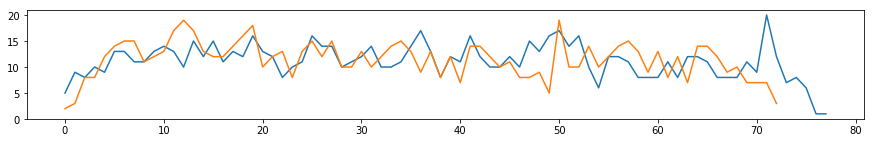

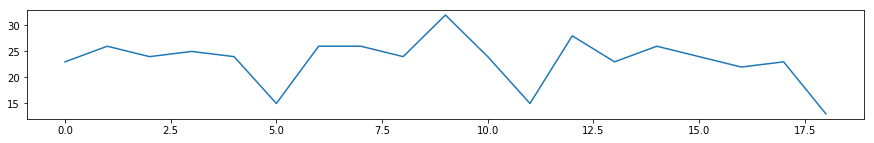

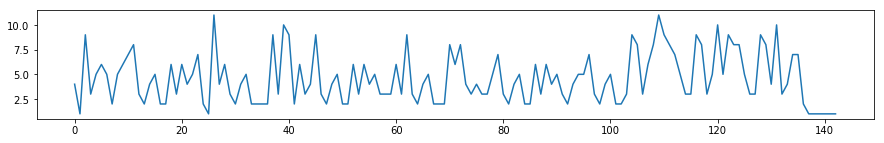

In [8]:
plt.figure(figsize=(15,2))
plt.plot(list(desprez_epc.values()))
plt.plot(list(ave_epc.values()))
plt.figure(figsize=(15,2))
plt.plot(list(bach_epc.values()))
plt.figure(figsize=(15,2))
plt.plot(list(quant_epc.values()))

# Momento de dividir en voces

In [9]:
def voz_sep(lista, vozdeseada):
    voz1 = []
    voz2 = []
    voz3 = []
    voz4 = []
    voz5 = []
    for elem in lista:
        if elem[0] == 1:
            voz1.append(elem)
        elif elem[0] == 2:
            voz2.append(elem)
        elif elem[0] == 3:
            voz3.append(elem)
        elif elem[0] == 4:
            voz4.append(elem)
        elif elem[0] == 5:
            voz5.append(elem)
    if vozdeseada == 1:
        return voz1
    elif vozdeseada == 2:
        return voz2
    elif vozdeseada == 3:
        return voz3
    elif vozdeseada == 4:
        return voz4
    elif vozdeseada == 5:
        return voz5
     
#Ave dulccissima
ave_dulc_sop = voz_sep(ave_dulc_ncomp, 1)
ave_dulc_alt= voz_sep(ave_dulc_ncomp, 2)
ave_dulc_ten = voz_sep(ave_dulc_ncomp, 3)
ave_dulc_ten2 = voz_sep(ave_dulc_ncomp, 4)
ave_dulc_bass = voz_sep(ave_dulc_ncomp, 5)
    
#bach motet
bach_mot_sop = voz_sep(bach_motfin_ncomp,1)
bach_mot_alt= voz_sep(bach_motfin_ncomp,2)
bach_mot_ten = voz_sep(bach_motfin_ncomp,3)
bach_mot_bass = voz_sep(bach_motfin_ncomp,4)
    
#quant en moi
quant_triplum = voz_sep(quant_en_moi_ncomp,1)
quant_motetus = voz_sep(quant_en_moi_ncomp,2)
quant_tenor = voz_sep(quant_en_moi_ncomp,3)

#desprez nymphes
desprez_nymph_sop = voz_sep(desprez_nymphes_ncomp,1)
desprez_nymph_alt = voz_sep(desprez_nymphes_ncomp,2)
desprez_nymph_ten = voz_sep(desprez_nymphes_ncomp,3)
desprez_nymph_ten2 = voz_sep(desprez_nymphes_ncomp,4)
desprez_nymph_bass = voz_sep(desprez_nymphes_ncomp,5)

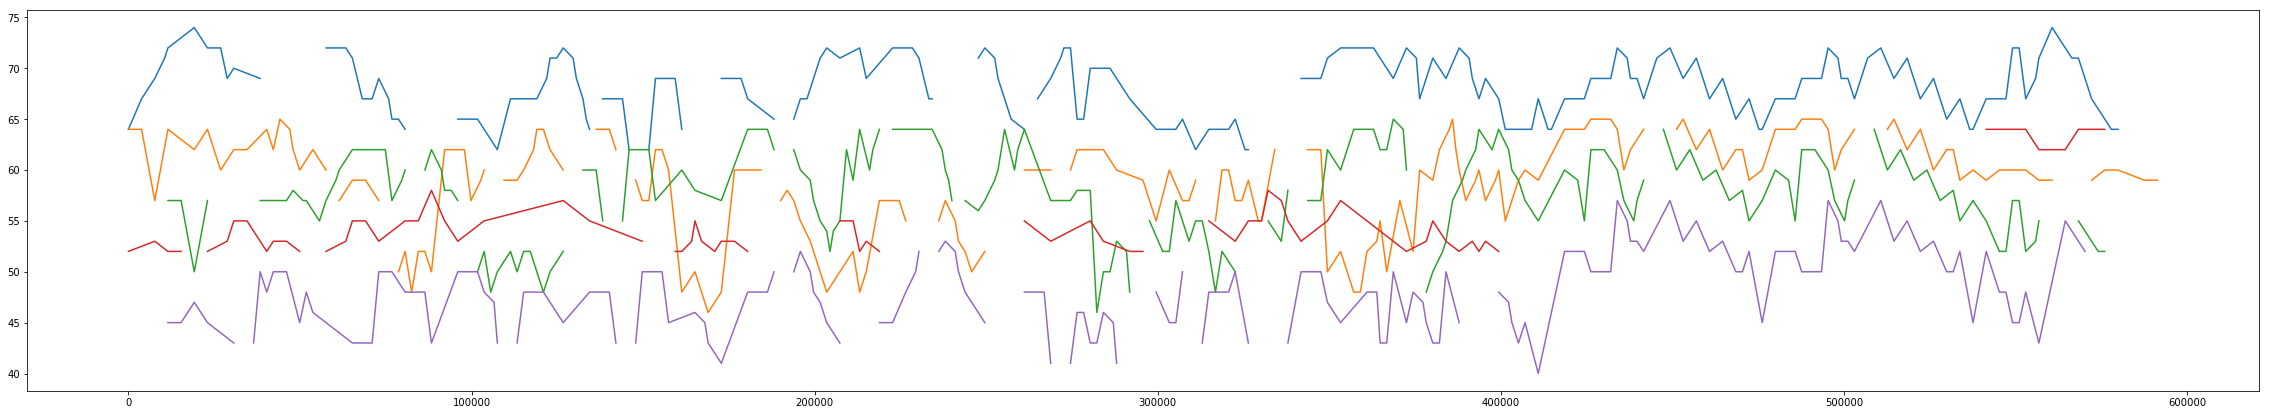

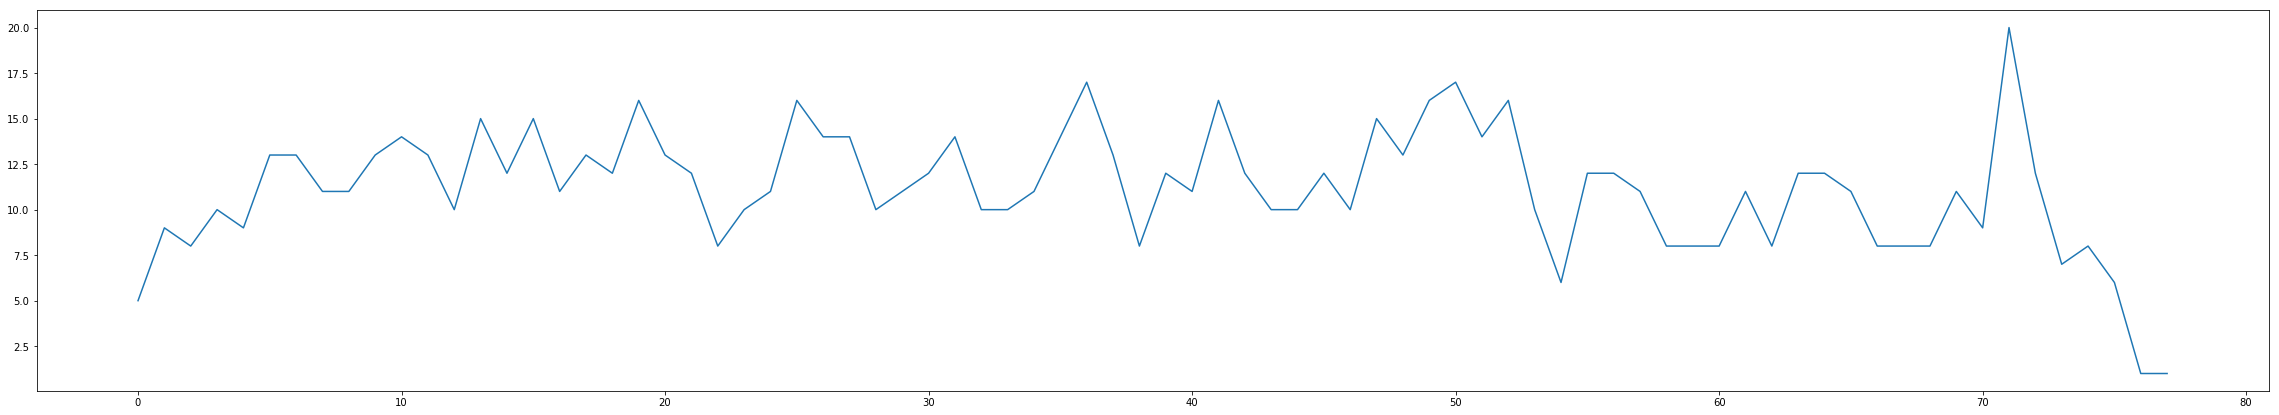

In [10]:
def plot_t_n(lista):    
    return plt.plot([x[1] for x in lista], [y[4] for y in lista])
plt.figure(figsize=(40,7))
plot_t_n(desprez_nymph_sop)
plot_t_n(desprez_nymph_alt)
plot_t_n(desprez_nymph_ten)
plot_t_n(desprez_nymph_ten2)
plot_t_n(desprez_nymph_bass)
plt.figure(figsize=(40,7))
plt.plot(list(desprez_epc.values()))

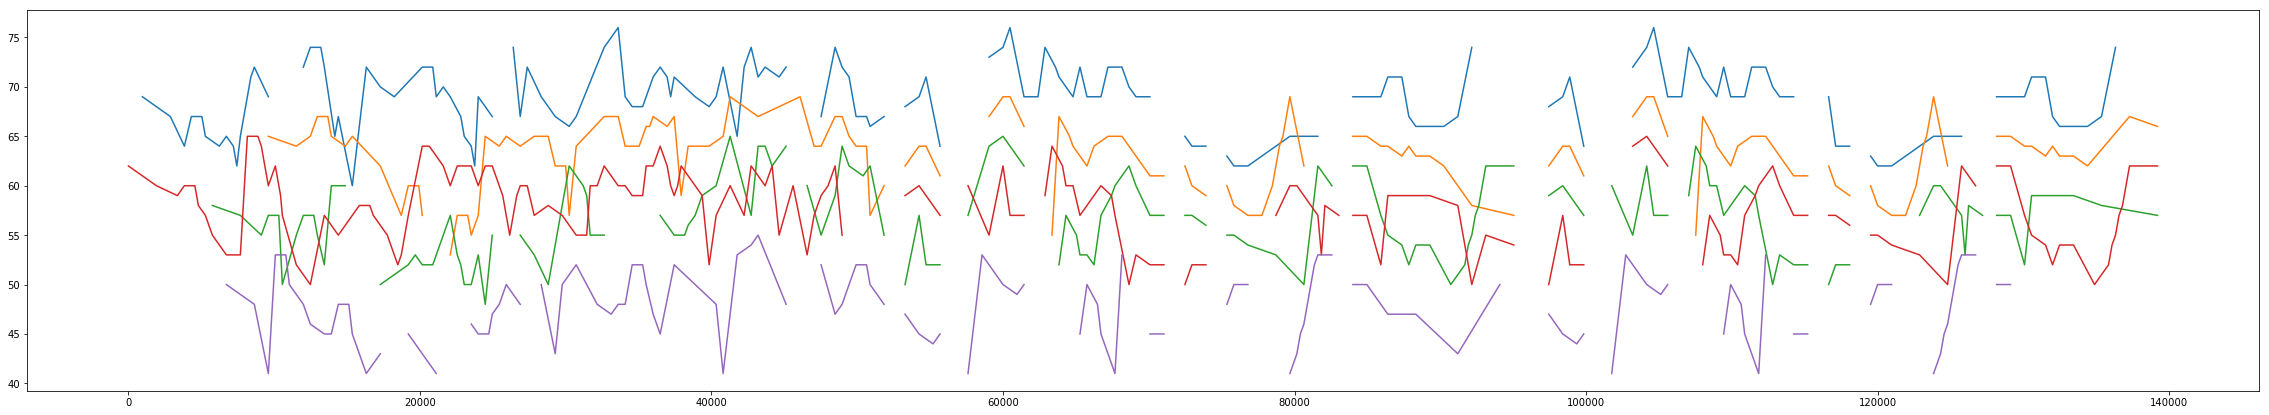

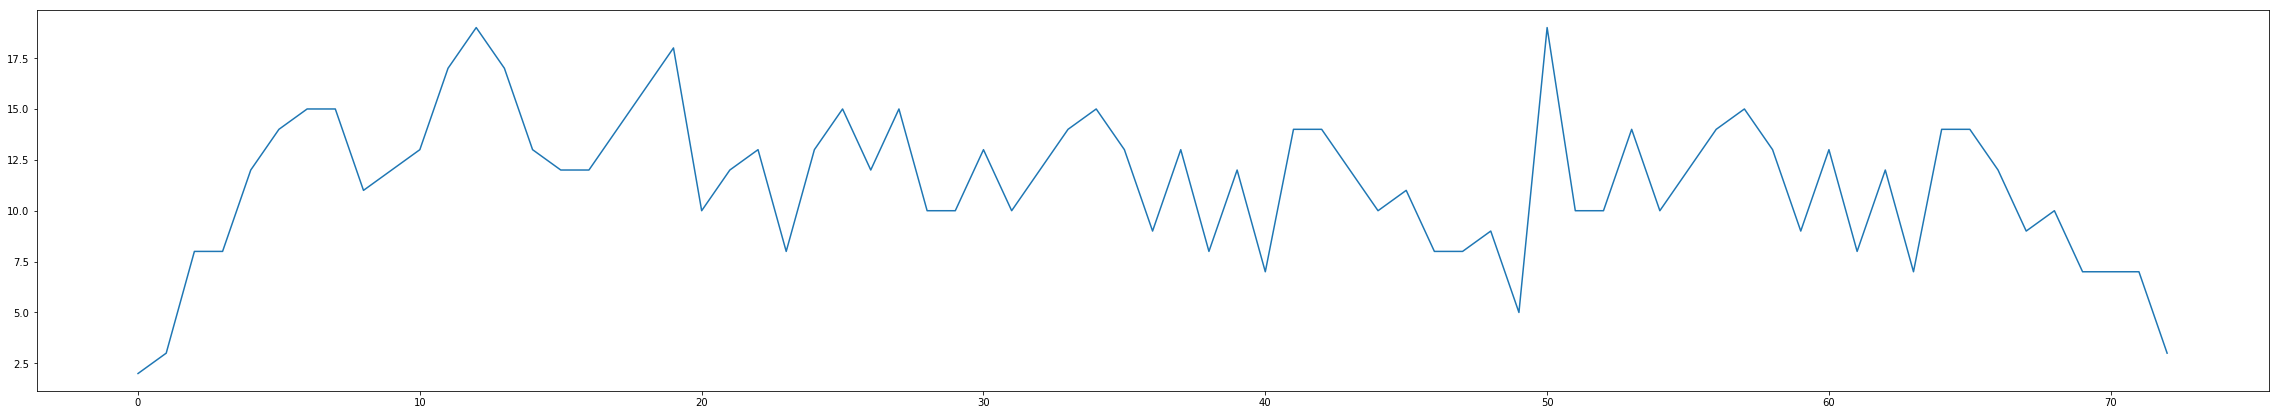

In [11]:
plt.figure(figsize=(40,7))
plot_t_n(ave_dulc_sop)
plot_t_n(ave_dulc_alt)
plot_t_n(ave_dulc_ten)
plot_t_n(ave_dulc_ten2)
plot_t_n(ave_dulc_bass)
plt.figure(figsize=(40,7))
plt.plot(list(ave_epc.values()))

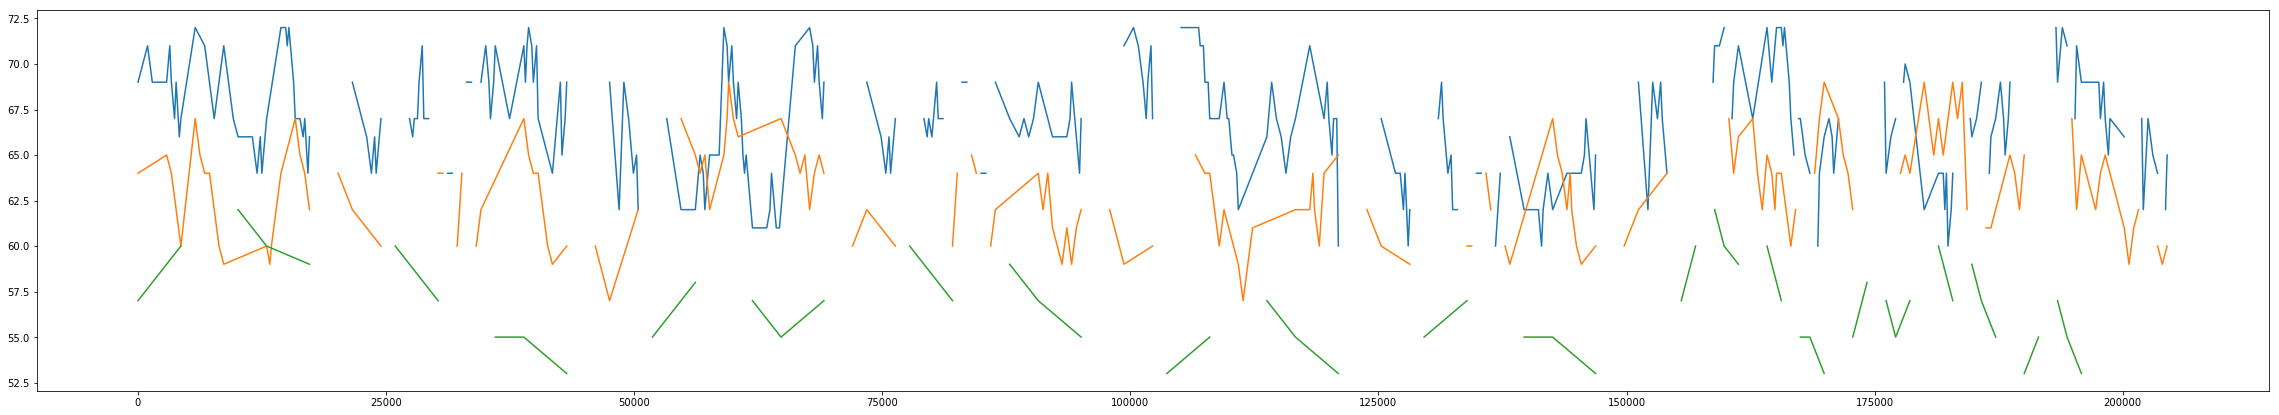

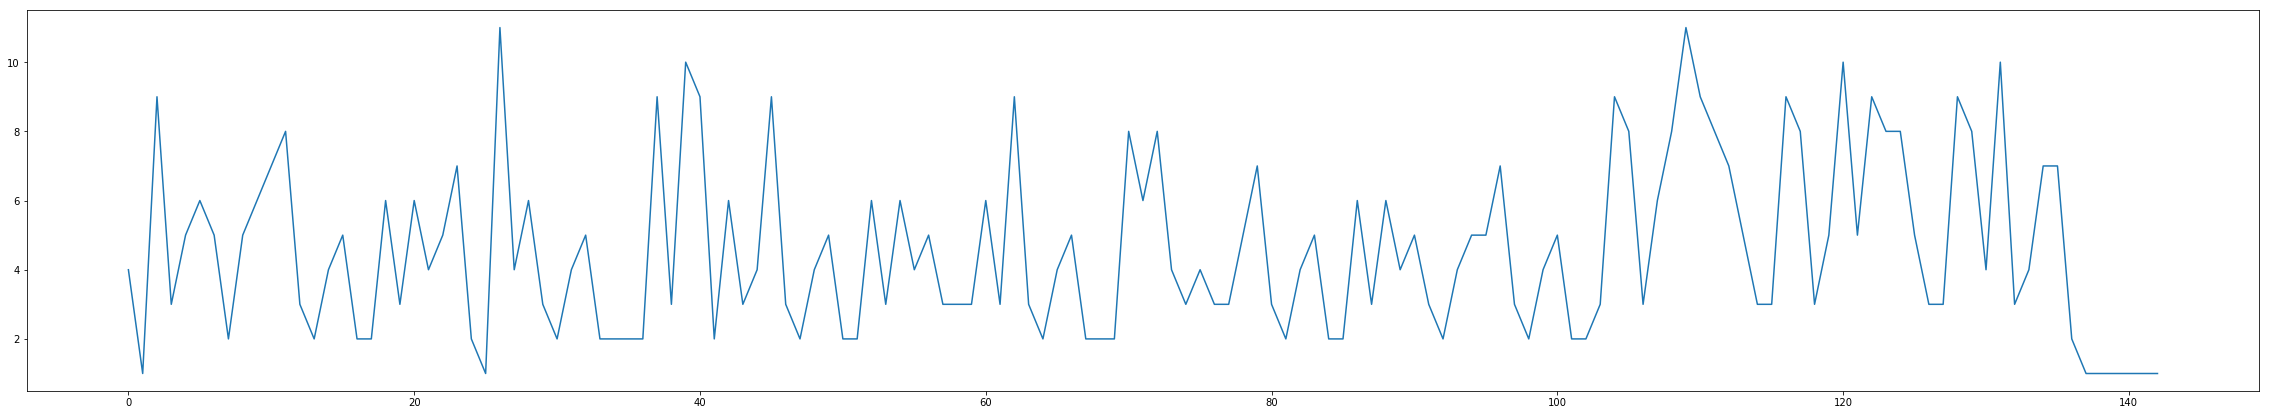

In [12]:
plt.figure(figsize=(40,7))
plot_t_n(quant_triplum)
plot_t_n(quant_motetus)
plot_t_n(quant_tenor)
plt.figure(figsize=(40,7))
plt.plot(list(quant_epc.values()))

#columna falsa que diga la duracion, thick t+1 - thick

# Notas

In [14]:
#Contemplar la posibilidad de utilizar las columnas de compás y momento dentro.
def notas_mismotiempo(lista, columnatiempo):
    notas_tiempo = {}
    for elem in lista:
        if elem[columnatiempo] in notas_tiempo:
            notas_tiempo[elem[columnatiempo]].append(elem[4])
        else:
            notas_tiempo[elem[columnatiempo]] = [elem[4]]
    return notas_tiempo

ave_dulc_nt = notas_mismotiempo(ave_dulc_ncomp,1)
ave_dulc_nt

{0: [62],
 960: [69],
 1920: [60],
 2880: [67],
 3360: [59],
 3840: [64, 60],
 4320: [67],
 4560: [60],
 4800: [58],
 5040: [67],
 5280: [65, 57],
 5760: [58, 55],
 6240: [64],
 6720: [65, 53, 50],
 7200: [64],
 7440: [62],
 7680: [65, 57, 53],
 7920: [67],
 8160: [69, 65],
 8400: [71],
 8640: [72, 48],
 8880: [65],
 9120: [55, 64],
 9600: [69, 65, 57, 60, 41],
 10080: [62, 53],
 10320: [57, 60],
 10440: [59],
 10560: [50, 57],
 10800: [53],
 11040: [50],
 11520: [None, 64, 55, 52],
 12000: [72, 57, 48],
 12480: [74, 65, 50, 46],
 12720: [57],
 12960: [67, 55],
 13200: [74],
 13440: [72, 52, 57, 45],
 13680: [67],
 13920: [65, 60, 45],
 14160: [65],
 14400: [67, 55, 48],
 14880: [64, 60],
 15120: [48],
 15360: [60, 65, None, 57, 45],
 15840: [58, 43],
 16320: [72, 41],
 16560: [58],
 16800: [57],
 17280: [70, 62, 50, 43],
 17760: [55],
 18240: [69, 53, None],
 18480: [52],
 18720: [57, 53],
 18960: [55],
 19200: [60, 52, 57, 45],
 19680: [53],
 19920: [60],
 20160: [72, 57, 52, 64],
 2

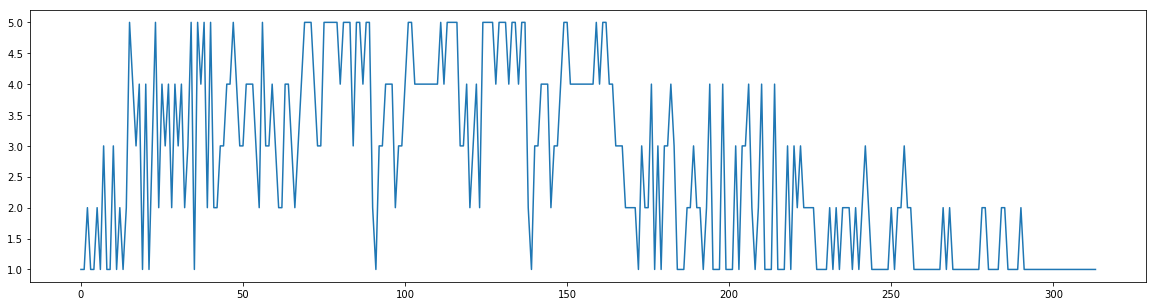

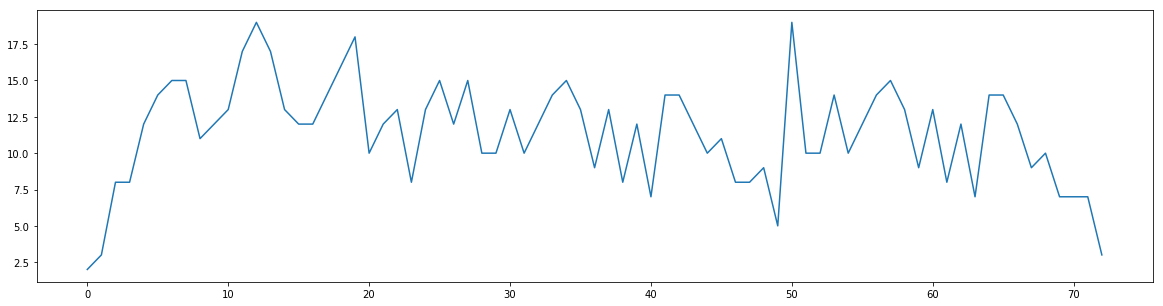

In [56]:
ave_notasjuntas = []
for elem in ave_dulc_nt.values():
    ave_notasjuntas.append(len(elem))
plt.figure(figsize=(20,5))    
plt.plot(ave_notasjuntas)
plt.figure(figsize=(20,5)) 
plt.plot(list(ave_epc.values()))

In [15]:
'''
TENER TODO YA DEFINIDO.
TRAER CADA PARTE AUNQUE NO LA TENGAS. EJERCITAR LA ESTRUCTURA.
Creersela y mentir no viene mal.

s1-Metodologias. resumen de clases.

OBJETIVO: explicitar el proceso creativo.
el error tecnico es posibilidad de probar cosas nuevas.
cine cine cine

'''

'\nTENER TODO YA DEFINIDO.\nTRAER CADA PARTE AUNQUE NO LA TENGAS. EJERCITAR LA ESTRUCTURA.\nCreersela y mentir no viene mal.\n\ns1-Metodologias. resumen de clases.\n\nOBJETIVO: explicitar el proceso creativo.\nel error tecnico es posibilidad de probar cosas nuevas.\ncine cine cine\n\n'

In [54]:
# Misa lhomme armé
# kein freud
# adorna talaum tuum
# bonjour lassus
# solo e pensoso

# Armonia, ventana temporal y hacer clasificacion intervalica, entre 1 y 2, entre 2 y 3, entre 3 y 4, 
# Variable root tiene el midi note de la primera, hacer una columna que haga nota actual menos root, de ahi gtado de pitch class de cada nota 
# Comparacion del mismo tiempo y hacer contexto armonia
# PITCH RELATIVO AL ROOT
# De ahi los acordes, 
# Ordenar las veces de apariciones y medir cual mas aparece: tonica, dominante
# Relacionar las armonias mas comunes con densidad cronometrica
# Centroides armonicos

In [52]:
def notefromroot(lista):
    root = lista[0][4]
    for elem in lista:
        if elem[4] != None and len(elem) == 8:
            elem.append(abs(elem[4] - root))
    return lista

for elem in ave_dulc_ncomp:
    while len(elem) > 9:
        del elem[-1]
        
desprez_nym_nfr = notefromroot(desprez_nymphes_ncomp)
quant_en_moi_nfr = notefromroot(quant_en_moi_ncomp)
ave_dulc_nfr = notefromroot(ave_dulc_ncomp)

def notafromroot_mismotiempo(lista, columnatiempo):
    notas_tiempo = {}
    for elem in lista:
        if elem[columnatiempo] in notas_tiempo and elem[4] != None:
            notas_tiempo[elem[columnatiempo]].append(elem[8])
        elif elem[4] != None:
            notas_tiempo[elem[columnatiempo]] = [elem[8]]
    return notas_tiempo

desprez_nfr = notafromroot_mismotiempo(desprez_nym_nfr, 1)
desprez_nfr

{0: [0, 0, 12],
 3840: [3, 0],
 7680: [5, 7, 11],
 10560: [7],
 11520: [8, 0, 7, 12, 19],
 15360: [7, 12, 19],
 19200: [10, 2, 14, 17],
 23040: [8, 0, 7, 12, 19],
 24960: [8],
 26880: [8, 4],
 28800: [5, 11],
 30720: [6, 2, 9, 21],
 34560: [2, 9],
 36480: [21],
 38400: [5, 7, 11, 14],
 40320: [0, 12, 16],
 42240: [2, 7, 11, 14],
 44160: [1, 7],
 46080: [7, 11, 14],
 47040: [0],
 48000: [2, 6],
 49920: [4, 12, 19],
 50880: [7],
 51840: [7, 16],
 53760: [2, 18],
 55680: [9],
 57600: [8, 4, 7, 12, 19],
 60480: [5],
 61440: [8, 7, 4],
 63360: [8, 11],
 65280: [7, 5, 2, 9, 21],
 68160: [3],
 69120: [3, 5, 2, 9, 21],
 71040: [3, 21],
 72960: [5, 7, 11, 14],
 74880: [2],
 75840: [3],
 76800: [1, 7, 14],
 78720: [1, 14],
 79680: [5],
 80640: [0, 12, 4, 9, 16],
 82560: [16],
 83520: [16],
 84480: [12, 9, 16],
 86400: [12, 4, 16],
 88320: [14, 2, 6, 21],
 91200: [4],
 92160: [2, 6, 9],
 94080: [6],
 96000: [1, 2, 7, 11, 14],
 97920: [2],
 99840: [1, 7, 14],
 101760: [1, 14, 14],
 102720: [5],
 1

In [ ]:
'''
COMO LA SIMULTANEIDAD

'''